In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("../data/data.csv")
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


* There are 569 rows and 33 columns
* All columns are numerical except diagnosis and the 33rd column with all values null.

* check null value

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* the 32th column is null entirely so let's drop it

In [4]:
train_df.drop("Unnamed: 32",axis=1,inplace=True)

In [5]:
print("unique column values")
train_df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)

unique column values


id                      569
smoothness_se           547
fractal_dimension_se    545
area_worst              544
concave points_mean     542
compactness_se          541
radius_se               540
concavity_worst         539
area_mean               539
compactness_mean        537
dtype: int64

* check duplicates

In [6]:
def duplicate(df):
    dups = df.duplicated()
    print("There are duplicates: {}".format(dups.any()))
    print(df[dups])

In [7]:
duplicate(train_df)

There are duplicates: False
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


In [8]:
df = train_df.copy()
df.drop("id", axis=1, inplace=True)

def df_info(df):
    return (df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm'))

DATASET DESCRIPTION

In [9]:
df_info(df)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


* There is a high variation in area_mean and area_worst.
* Most columns like smothness_mean, compactness_mean, compactness_worst, concavity_worst...etc have median value of 0.
* The area_worst feature’s max value is 4254 and fractal_dimension_se features’ max 0.029840. This indicates we need to standardize or normalize data before visualization, feature selection, and classification.

* Diagnosis types

In [10]:
pd.value_counts(train_df['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

* Diagnosis:
    - Malignant = 212
    - Benign = 357

In [11]:
def plot_graph(x, data):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=x, data=data, palette='rocket')

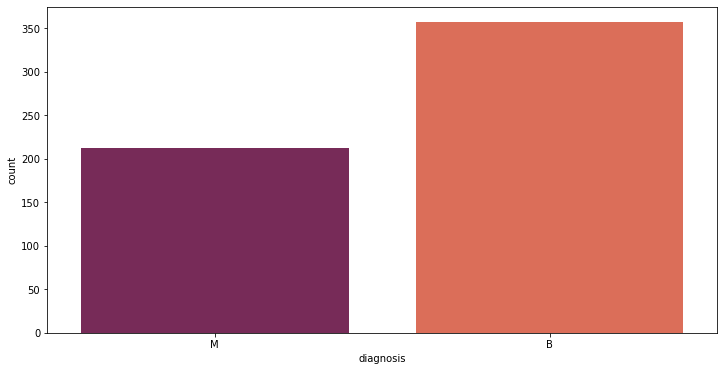

In [12]:
plot_graph("diagnosis", train_df)

DATASET EXPLORATION

* A violinplot is a graphical representation of data where values are depicted by color. 
* Before plotting our data we need to normalization or standardization. Because differences between values of features are very high to observe on plot. 
* We plot features in two groups and each group includes 15 features to observe better.

In [13]:
def plot_violin(df, y):
    df_n_2 = (df - df.mean()) / (df.std())
    df = pd.concat([y,df_n_2.iloc[:,0:15]],axis=1)
    df = pd.melt(df,id_vars="diagnosis", var_name="features", value_name="value")
    
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=df,split=True, inner="quart",palette ="Set2")
    plt.xticks(rotation=90)
    
    df = pd.concat([y,df_n_2.iloc[:,15:30]],axis=1)
    df = pd.melt(df,id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=df,split=True, inner="quart",palette ="Set2")
    plt.xticks(rotation=90)
    
    

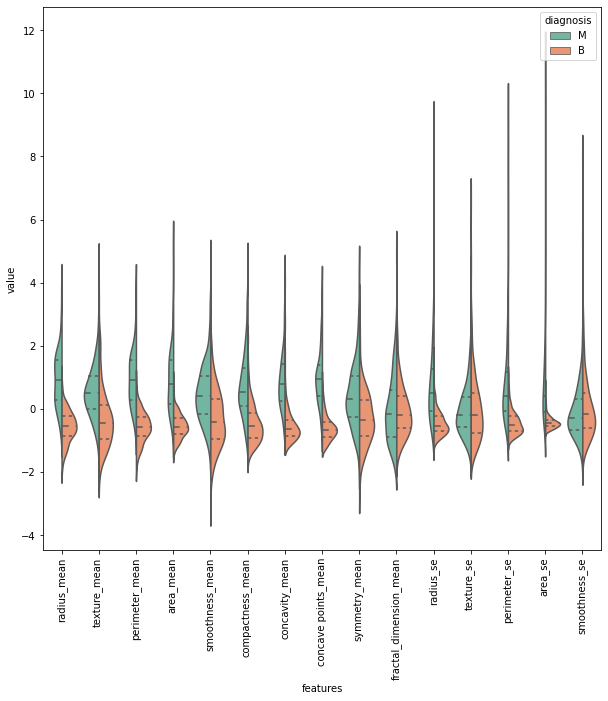

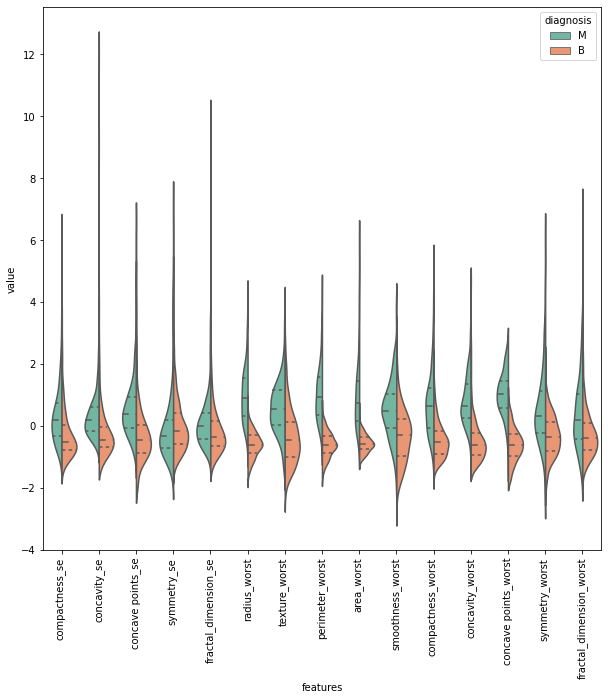

In [14]:
y = df.diagnosis
df2 = df.copy()

df2.drop("diagnosis", axis = 1, inplace= True)
plot_violin(df2, y)

CHECK OUTLIERS

In [15]:
def check_outliers(df, y):
    df_std = (df - df.mean()) / (df.std())              
    df = pd.concat([y,df_std.iloc[:,0:10]],axis=1)
    df = pd.melt(df,id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(17,5))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=df)
                
    df = pd.concat([y,df_std.iloc[:,10:20]],axis=1)
    df = pd.melt(df,id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(17,5))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=df)
            
    df = pd.concat([y,df_std.iloc[:,20:30]],axis=1)
    df = pd.melt(df,id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(20,5))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=df)
    

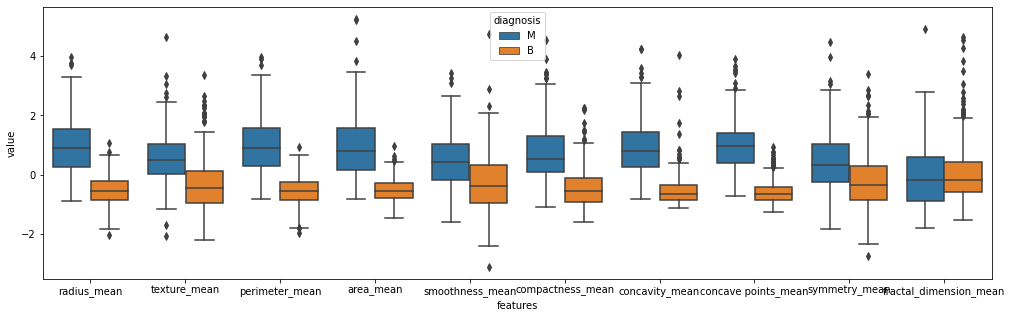

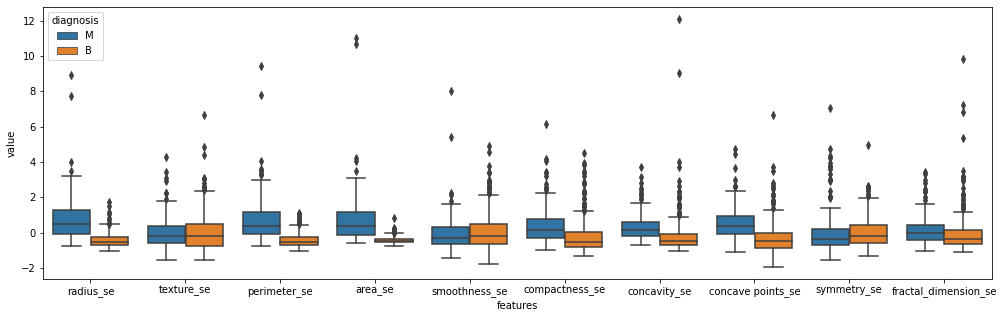

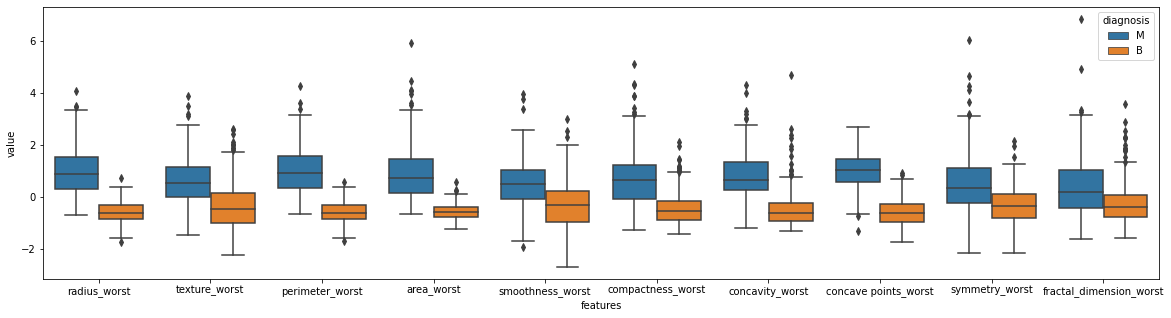

In [16]:
check_outliers(df2, y)

CORRELATION

In [45]:
def joint_plot(df, col1, col2):
    sns.set(style="white", color_codes=True)
    jp=sns.jointplot(df.loc[:,col1], df.loc[:,col2], kind="reg",color="b")
    r, p = stats.pearsonr(df.loc[:,col1], df.loc[:,col2])
    jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

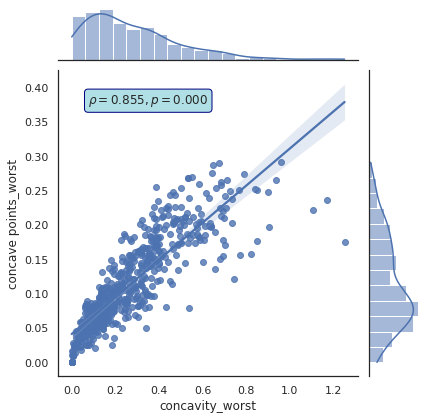

In [46]:
joint_plot(df2, "concavity_worst", "concave points_worst")

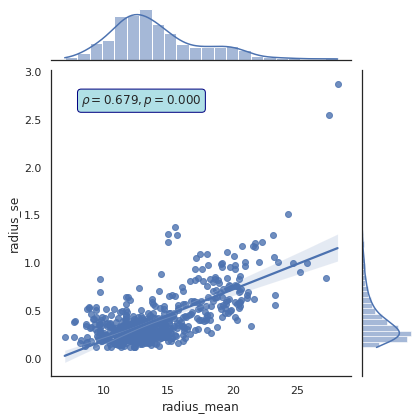

In [47]:
joint_plot(df2, "radius_mean", "radius_se")

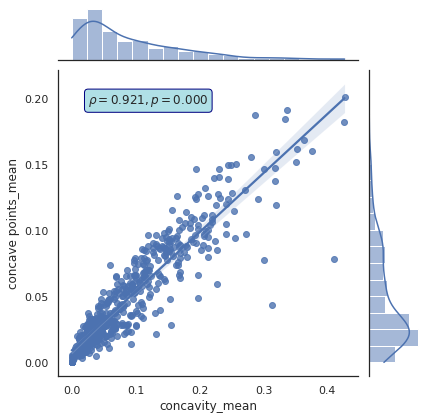

In [48]:
joint_plot(df2, "concavity_mean", "concave points_mean")

In [19]:
def plot_heatmap(df):
    plt.figure(figsize=(20, 17))
    matrix = np.triu(df.corr())
    sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")

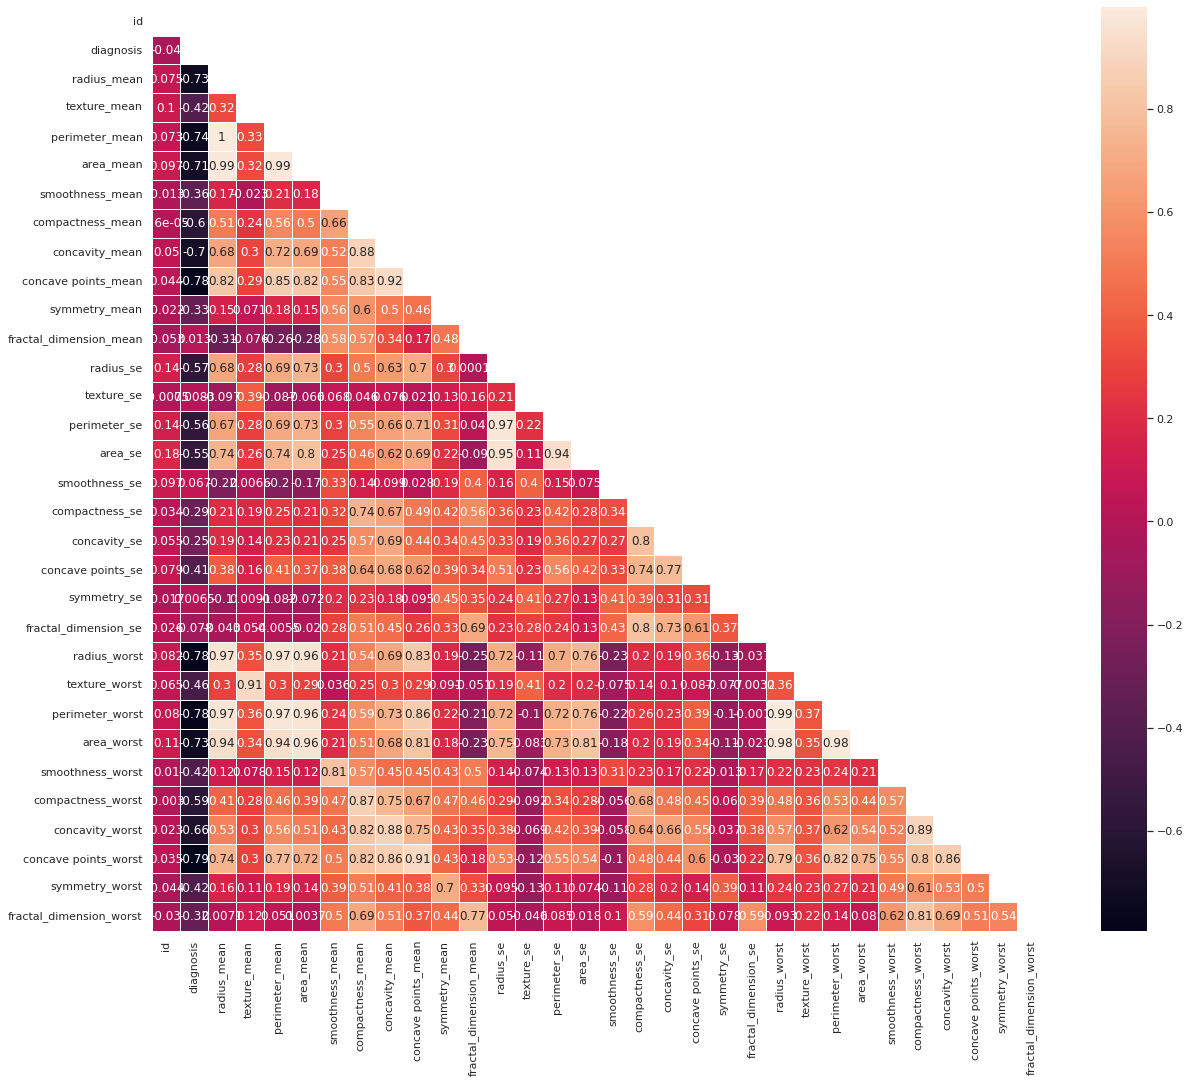

In [20]:
plot_heatmap(train_df)